In [ ]:
!pip install mycolorpy

  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3850 sha256=41a02504eaa15e6ce475cf6a54b3750a7d664a824d3cdcaa5088c4d9b4369664
  Stored in directory: /root/.cache/pip/wheels/ff/08/3f/5b1529bd9a56c309bc2b6509247e7f7968b3558c6090ce30ee
Successfully built mycolorpy


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import matplotlib
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from mycolorpy import colorlist as mcp

# Points

In [ ]:
def isInside(x0, y0, r, x, y):
    if ((x - x0) * (x - x0) +
        (y - y0) * (y - y0) <= r * r):
        return True;
    else:
        return False;

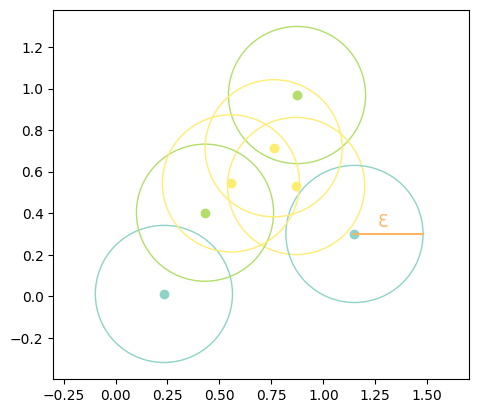

In [ ]:
np.random.seed(8)
X = np.random.uniform(low=0, high=1, size=(7,2))

X[4] = [1.15, 0.3]
epsilon = 0.33
minPoint = 3

fig, ax = plt.subplots()
for j in range(len(X)):
  if sum([isInside(X[j][0], X[j][1], epsilon, X[i][0],
                   X[i][1]) for i in range(len(X))]) >= minPoint:
    color = mcp.gen_color(cmap="Set3",n=12)[11]
    ax.add_patch(plt.Circle([X[j][0], X[j][1]], epsilon, color=color,
                            alpha=1, fill = False))
    plt.scatter(X[j, 0], X[j, 1], color=color)
  elif sum([isInside(X[j][0], X[j][1], epsilon,
                     X[i][0], X[i][1]) for i in range(len(X))]) == 1:
    color = mcp.gen_color(cmap="Set3",n=12)[0]
    ax.add_patch(plt.Circle([X[j][0], X[j][1]], epsilon, color=color,
                            alpha=1, fill = False))
    plt.scatter(X[j, 0], X[j, 1], color=color)
  else:
    color = mcp.gen_color(cmap="Set3",n=12)[6]
    ax.add_patch(plt.Circle([X[j][0], X[j][1]], epsilon, color=color,
                            alpha=1, fill = False))
    plt.scatter(X[j, 0], X[j, 1], color=color)
#ax.add_patch(plt.Circle((1, 0.9), epsilon, color='#00ffff', alpha=0.5))

plt.plot([X[4][0],X[4][0]+epsilon], [X[4][1],X[4][1]], '-',
         c=mcp.gen_color(cmap="Set3",n=12)[5])
plt.text(X[4][0]+(epsilon/3), X[4][1]+(epsilon/10), 'Ɛ',
         c=mcp.gen_color(cmap="Set3",n=12)[5], fontsize=12)

ax.set_xlim(left = -0.3, right = 1.7)
ax.set_aspect('equal')
ax.plot()
plt.show()

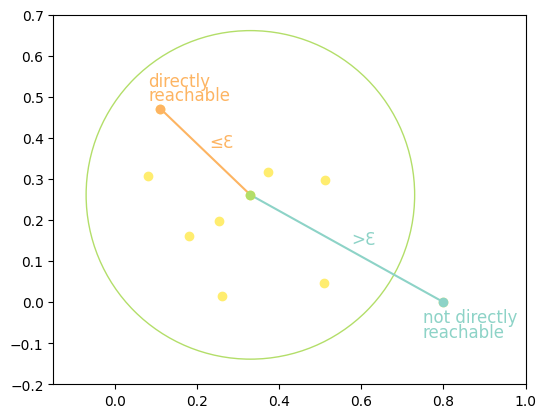

In [ ]:
np.random.seed(2)
X = np.random.uniform(low=0, high=0.6, size=(10,2))
X[3]=[0.8, 0]
epsilon = 0.4
fig, ax = plt.subplots()
color = mcp.gen_color(cmap="Set3",n=12)[11]

ax.add_patch(plt.Circle([X[1][0], X[1][1]], epsilon,
                        color=mcp.gen_color(cmap="Set3",n=12)[6], alpha=1,
                        fill = False))

ax.scatter(X[:, 0], X[:, 1], color=color)


ax.plot([X[1][0],X[7][0]], [X[1][1],X[7][1]], '-',
        c=mcp.gen_color(cmap="Set3",n=12)[5])
plt.text(X[7][0]-0.03, X[7][1]+0.055, 'directly',
         c=mcp.gen_color(cmap="Set3",n=12)[5], fontsize=12)
plt.text(X[7][0]-0.03, X[7][1]+0.02, 'reachable',
         c=mcp.gen_color(cmap="Set3",n=12)[5], fontsize=12)
plt.text((X[1][0]+X[7][0])/2+0.01, (X[1][1]+X[7][1])/2+0.01, '≤Ɛ',
         c=mcp.gen_color(cmap="Set3",n=12)[5], fontsize=12)
ax.scatter(X[7][0], X[7][1], color=mcp.gen_color(cmap="Set3",n=12)[5])

ax.plot([X[1][0],X[3][0]], [X[1][1],X[3][1]], '-',
        c=mcp.gen_color(cmap="Set3",n=12)[0])
plt.text(X[3][0]-0.05, X[3][1]-0.05, 'not directly',
         c=mcp.gen_color(cmap="Set3",n=12)[0], fontsize=12)
plt.text(X[3][0]-0.05, X[3][1]-0.085, 'reachable',
         c=mcp.gen_color(cmap="Set3",n=12)[0], fontsize=12)
plt.text((X[1][0]+X[3][0])/2+0.01, (X[1][1]+X[3][1])/2+0.01, '>Ɛ',
         c=mcp.gen_color(cmap="Set3",n=12)[0], fontsize=12)

ax.scatter(X[3][0], X[3][1], color=mcp.gen_color(cmap="Set3",n=12)[0])

ax.scatter(X[1][0], X[1][1], color=mcp.gen_color(cmap="Set3",n=12)[6],
           zorder=4)

ax.set_xlim(left = -0.15, right = 1)
ax.set_ylim(bottom = -0.2, top = 0.7)
ax.set_aspect('equal')
ax.plot()
plt.show()

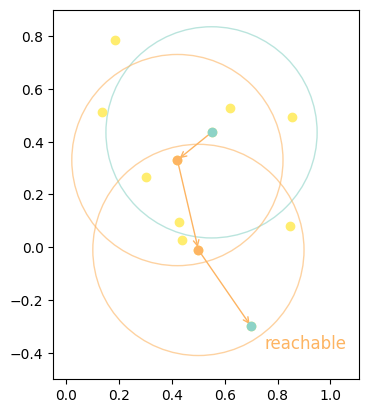

In [ ]:
np.random.seed(2)
X = np.random.uniform(low=0, high=1, size=(12,2))
X[3]=[0.7, -0.3]
X[10]=[0.5, -0.01]
epsilon = 0.4
fig, ax = plt.subplots()
color1 = mcp.gen_color(cmap="Set3",n=12)[6]
color2 = mcp.gen_color(cmap="Set3",n=12)[5]
color3 = mcp.gen_color(cmap="Set3",n=12)[0]
ax.add_patch(plt.Circle([X[1][0], X[1][1]], epsilon, color=color3,
                        alpha=0.6, fill = False))
ax.add_patch(plt.Circle([X[2][0], X[2][1]], epsilon, color=color2,
                        alpha=0.6, fill = False))
ax.add_patch(plt.Circle([X[10][0], X[10][1]], epsilon, color=color2,
                        alpha=0.6, fill = False))
ax.scatter(X[:, 0], X[:, 1], color=color)


ax.annotate("", xy=(X[2][0], X[2][1]), xytext=(X[1][0], X[1][1]),
            arrowprops=dict(arrowstyle="->", color=color2))
ax.annotate("", xy=(X[10][0], X[10][1]), xytext=(X[2][0], X[2][1]),
            arrowprops=dict(arrowstyle="->", color=color2))
ax.annotate("", xy=(X[3][0], X[3][1]), xytext=(X[10][0], X[10][1]),
            arrowprops=dict(arrowstyle="->", color=color2))

ax.scatter(X[2][0], X[2][1], color=color2, zorder=4)
ax.scatter(X[10][0], X[10][1], color=color2, zorder=4)
ax.scatter(X[1][0], X[1][1], color=color3, zorder=4)
ax.scatter(X[3][0], X[3][1], color=color3, zorder=4)

plt.text(X[3][0]+0.05, X[3][1]-0.085, 'reachable',
         c=color2, fontsize=12)


ax.set_xlim(left = -0.05, right = 1.11)
ax.set_ylim(bottom = -0.5, top = 0.9)
ax.set_aspect('equal')
ax.plot()
plt.show()

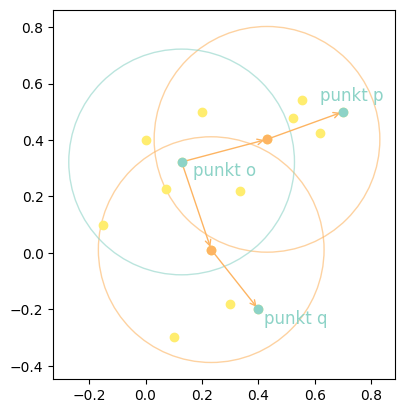

In [ ]:
np.random.seed(8)
X = np.random.uniform(low=0, high=1, size=(15,2))
epsilon = 0.4
X[0]=[0.2,0.5]
X[1]=[0.7,0.5]
X[6]=[0.4,-0.2]
X[8]=[0.3,-0.18]
X[10]=[0.1,-0.3]
X[13]=[-0.15,0.1]
X[14]=[0,0.4]

fig, ax = plt.subplots()
color1 = mcp.gen_color(cmap="Set3",n=12)[6]
color2 = mcp.gen_color(cmap="Set3",n=12)[5]
color3 = mcp.gen_color(cmap="Set3",n=12)[0]


ax.add_patch(plt.Circle([X[2][0], X[2][1]], epsilon, color=color2,
                        alpha=0.6, fill = False))
ax.add_patch(plt.Circle([X[3][0], X[3][1]], epsilon, color=color2,
                        alpha=0.6, fill = False))
ax.add_patch(plt.Circle([X[11][0], X[11][1]], epsilon, color=color3,
                        alpha=0.6, fill = False))

ax.scatter(X[:, 0], X[:, 1], color=color)


ax.annotate("", xy=(X[2][0], X[2][1]), xytext=(X[11][0], X[11][1]),
            arrowprops=dict(arrowstyle="->", color=color2))
ax.annotate("", xy=(X[3][0], X[3][1]), xytext=(X[11][0], X[11][1]),
            arrowprops=dict(arrowstyle="->", color=color2))
ax.annotate("", xy=(X[1][0], X[1][1]), xytext=(X[3][0], X[3][1]),
            arrowprops=dict(arrowstyle="->", color=color2))
ax.annotate("", xy=(X[6][0], X[6][1]), xytext=(X[2][0], X[2][1]),
            arrowprops=dict(arrowstyle="->", color=color2))

ax.scatter(X[2][0], X[2][1], color=color2, zorder=4)
ax.scatter(X[3][0], X[3][1], color=color2, zorder=4)
ax.scatter(X[1][0], X[1][1], color=color3, zorder=4)
ax.scatter(X[6][0], X[6][1], color=color3, zorder=4)
ax.scatter(X[11][0], X[11][1], color=color3, zorder=4)

plt.text(X[11][0]+0.04, X[11][1]-0.05, 'punkt o',
         c=color3, fontsize=12)
plt.text(X[1][0]-0.08, X[1][1]+0.04, 'punkt p',
         c=color3, fontsize=12)
plt.text(X[6][0]+0.02, X[6][1]-0.05, 'punkt q',
         c=color3, fontsize=12)

ax.set_aspect('equal')
ax.plot()
plt.show()

# Blobs

In [ ]:
X, y_true = make_blobs(n_samples=700, centers=3, cluster_std=0.6, random_state=0)

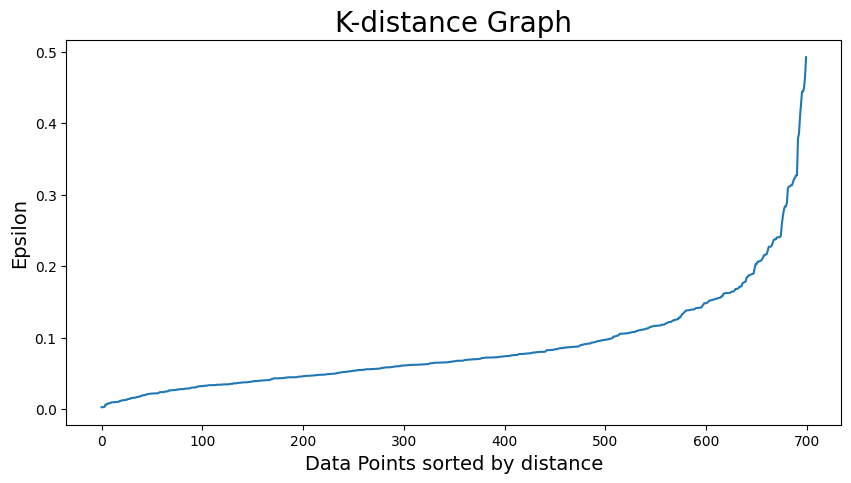

In [ ]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

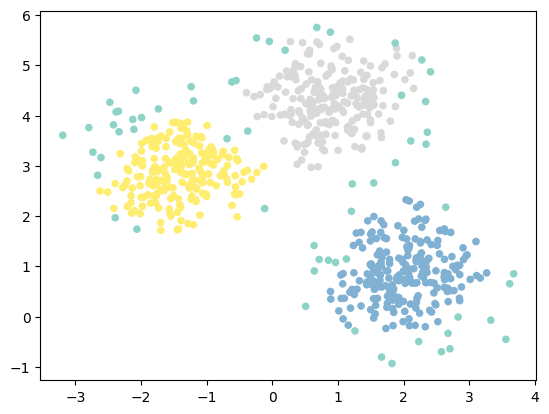

In [ ]:
dbscan=DBSCAN(eps=0.25,min_samples=4)
dbscan.fit(X)
clst = dbscan.labels_


plt.scatter(X[:, 0], X[:, 1], c=clst,
            s=20, cmap='Set3')
plt.show()

In [ ]:
?DBSCAN

# Księżyce

In [ ]:
X, y = make_moons(700, noise=.05, random_state=0)

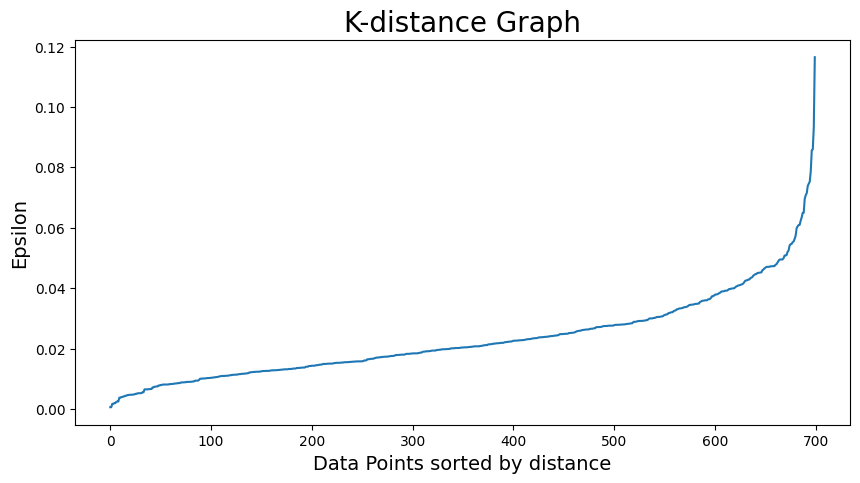

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

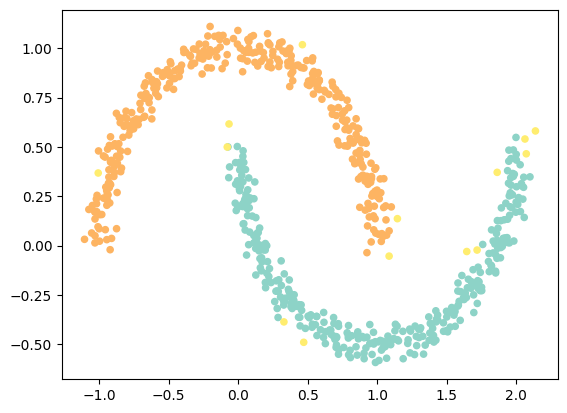

In [ ]:
dbscan=DBSCAN(eps=0.07,min_samples=4)
dbscan.fit(X)
clst = dbscan.labels_


plt.scatter(X[:, 0], X[:, 1], c=clst,
            s=20, cmap='Set3_r')
plt.show()

# Koła

In [ ]:
X, y = make_circles(800, factor=0.4, noise = 0.05, random_state=0)

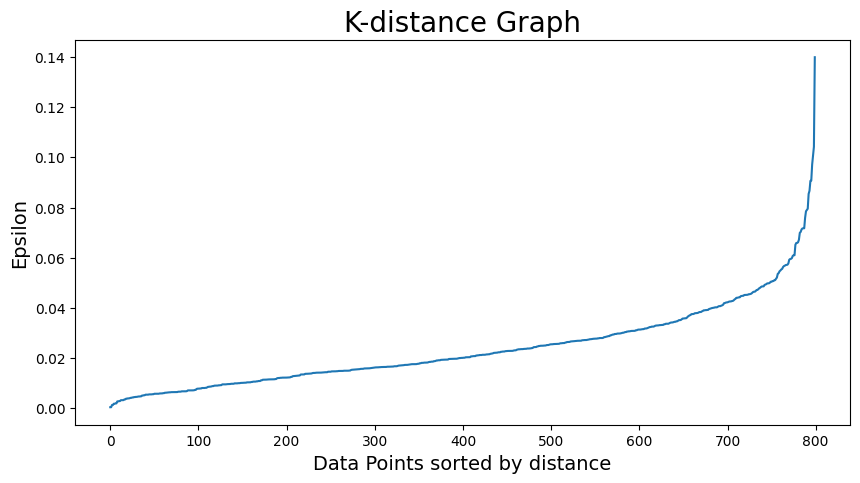

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

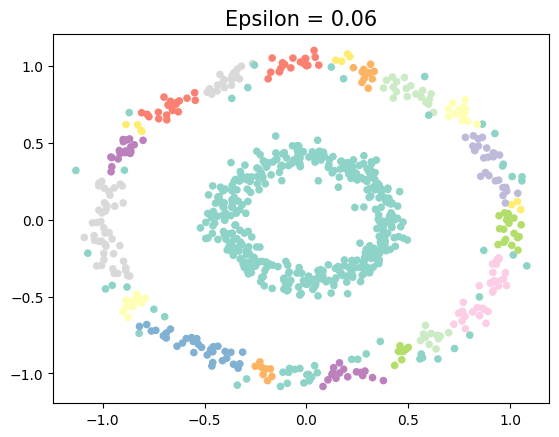

In [ ]:
dbscan=DBSCAN(eps=0.06,min_samples=4)
dbscan.fit(X)
clst = dbscan.labels_


plt.scatter(X[:, 0], X[:, 1], c=clst,
            s=20, cmap='Set3')
plt.title('Epsilon = 0.06',fontsize=15)
plt.show()

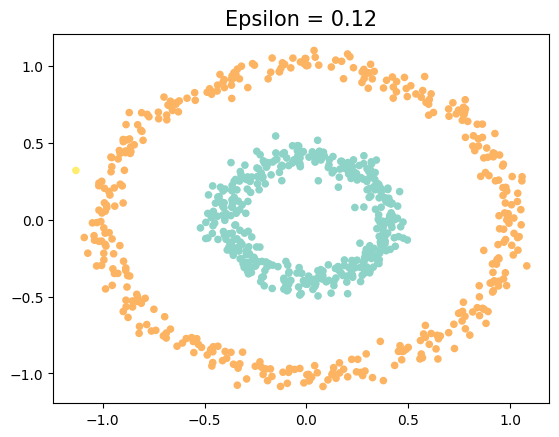

In [ ]:
dbscan=DBSCAN(eps=0.12,min_samples=4)
dbscan.fit(X)
clst = dbscan.labels_


plt.scatter(X[:, 0], X[:, 1], c=clst,
            s=20, cmap='Set3_r')
plt.title('Epsilon = 0.12',fontsize=15)
plt.show()

# Ryby

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load CSV into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Magisterka/fish_data.csv')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
y = df.species
X = df.drop('species', axis=1)

In [ ]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_transformed = scaler.inverse_transform(X_scaled)

In [ ]:
dbscan = DBSCAN(eps=0.03, min_samples=5
y_dbscan = dbscan.fit_predict(X_scaled)

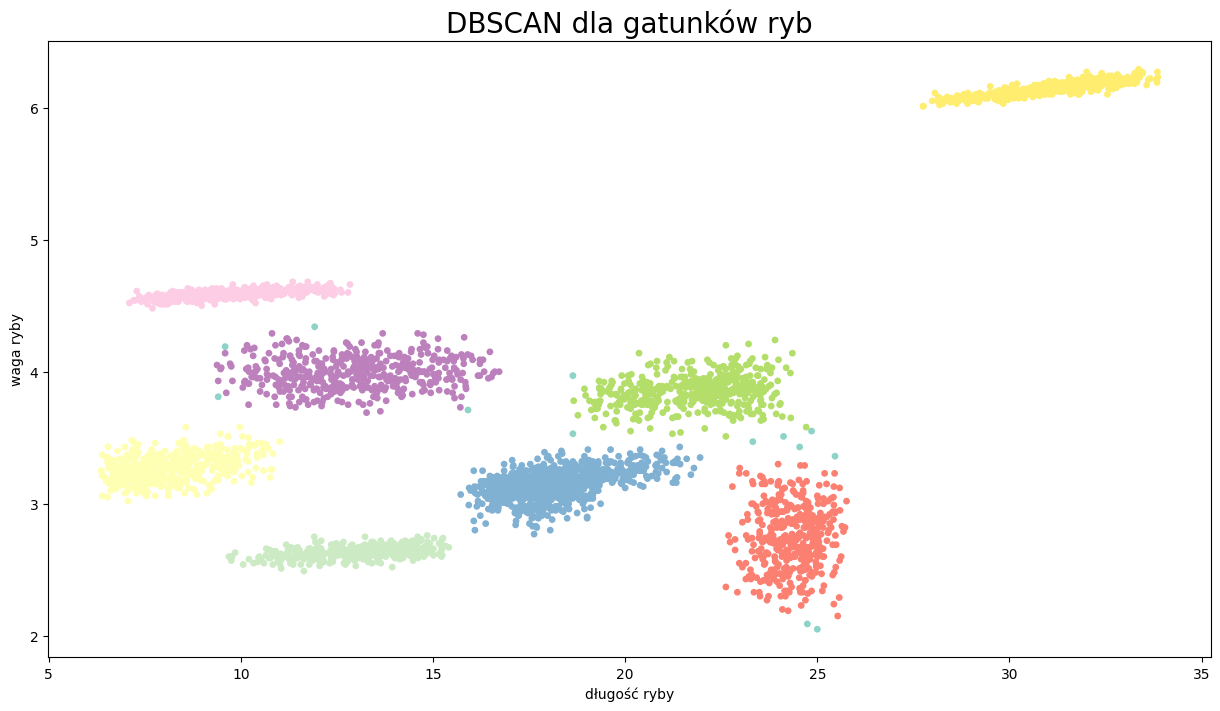

In [ ]:
# Visualize the clusters (Note: DBSCAN might have noise points labeled as -1)
plt.figure(figsize=(15,8))


plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=dbscan.labels_,
            s=15, cmap='Set3')

plt.title('DBSCAN dla gatunków ryb', fontsize=20)
plt.xlabel('długość ryby')
plt.ylabel('waga ryby')
plt.show()

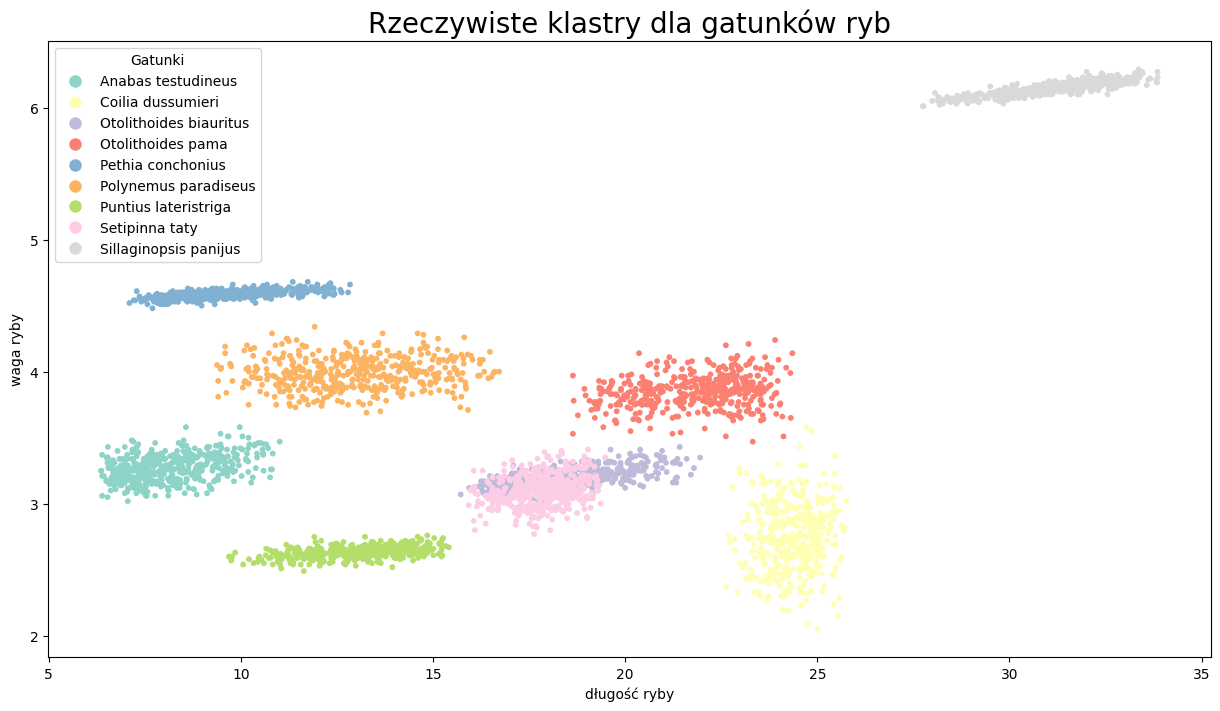

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

full_set3 = plt.get_cmap('Set3')
colors = [full_set3(i) for i in range(len(label_encoder.classes_))]

plt.figure(figsize=(15, 8))
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_encoded, cmap=ListedColormap(colors), s=10)

legend_labels = label_encoder.classes_
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=colors[i], markersize=10, label=legend_labels[i])
                   for i in range(len(legend_labels))]

plt.legend(handles=legend_elements, title="Gatunki")

plt.title('Rzeczywiste klastry dla gatunków ryb', fontsize=20)
plt.xlabel('długość ryby')
plt.ylabel('waga ryby')

plt.show()
